# Assignment 2 - Adult Income ML
## Author: Eduard Sinha - 217249111

**Original Database Source: Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.**

### Adult Dataset Description

1. age: continuous.

2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3. fnlwgt: continuous.

4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,     1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. education-num: continuous.

6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. sex: Female, Male.

11. capital-gain: continuous.

12. capital-loss: continuous.

13. hours-per-week: continuous.

14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15. income: >50k, <=50k.


Predict if the salary if over or under 50K




### Task 1 - Import Database and Libraries

In [68]:
# Import Libraries
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [69]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# Back Up of Dataset
adult_blackup = X

adult_concat = pd.concat((X,y), axis=1)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Task 2 - Examine Data Structure

In [71]:
# Display all the data in a a presentable table
adult_concat

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


.head()

In [72]:
adult_concat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


.info()

In [73]:
adult_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


.describe()

In [74]:
adult_concat.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


.shape()

In [75]:
X.shape

(48842, 14)

Task 2.1 - Plot Histogram

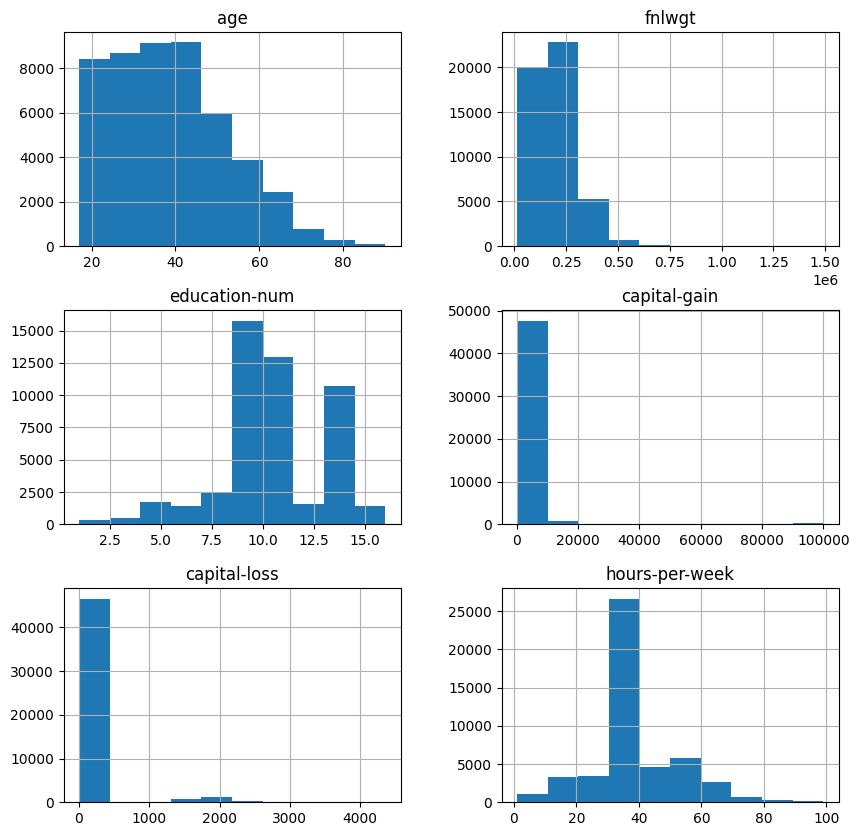

In [76]:
X.hist(figsize=(10,10))
plt.show()

### Task 3 - Check for Missing Values

In [77]:
# Checks for values of '?'
print((X.values == '?').sum())

# Number of NaN values
X.isna().sum()

4262


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

### Task 4 - Replace Missing Values

In [79]:
# Replaces the '?' with a NaN value
X = X.replace('?', np.nan)
X.info()

# Checks for values of '?'
print((X.values == '?').sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
0


### Task 5 - Create a Preprocessing Pipeline

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Splits numerical and catagorical data into seperate groups
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# Replaces missing values with the mean (for numerical) and the most common (for categorical)
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Sets estimators and transofrmations for the numerical and categorical
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

# Applies the pipeline on the  dataset
X_prepared = preprocessing.fit_transform(X)

# Adds the names of columns back
feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

# Pipeline
preprocessing


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [81]:
X_prepared.shape

(48842, 105)

### Task 6 - Check Target

In [82]:
# Displays the income data
y["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### Task 7 - Clean Target Data

In [83]:
# Removes the periods in the dataset 
y = y.replace('>50K.', '>50K')
y = y.replace('<=50K.', '<=50K')

y["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

### Task 8 - Split Data

In [84]:
from sklearn.model_selection import train_test_split

# Splits the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


### Task 9 - Train svm Model

In [85]:
from sklearn.svm import SVC

# Sets parameters for the model
model_svm = SVC(kernel='poly', C=0.1, gamma=1)

# Trains the model (10000 examples due to loading times)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())


SVC(C=0.1, gamma=1, kernel='poly')

Task 9.1 - Test Model

In [86]:
from sklearn.metrics import classification_report

# Predicts the income based on X_test data 
y_predict = model_svm.predict(X_test)

# Displays the results
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



### Task 9.2 Disply Confusion Matrix

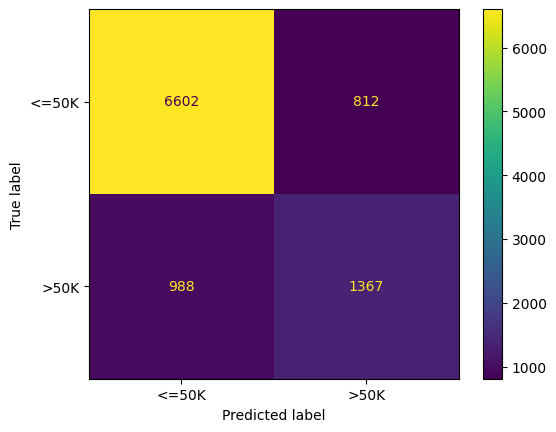

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

# Displays a Confusion Matrix for the perdicted values
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### Task 10 Grid Search 

10.1 Find Best Parameters

In [88]:
# Splits dataset into 60% training and 40% testing and validation
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

# Splits the 40% into 50% validation and 50% testing
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


In [89]:
from sklearn.model_selection import GridSearchCV

# Parameters for the search
svm_parameters = {'kernel' : ['rbf'], 
                  'C' : [0.01, 0.1, 1, 10], 
                  'gamma' : [0.1, 1, 10]
                }

svm = SVC()
svm_gs = GridSearchCV(estimator= svm, param_grid= svm_parameters)

# Sreaches thought the dataset with each parameter combination
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

# Selects the best parameter results
svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

# Prints best results

svm_winner

SVC(C=1, gamma=0.1)

10.2 Test Model With smv_winner

In [92]:
# Sets svm winner parameters for the model
model_svm_winner = SVC(kernel='rbf', C=1, gamma=0.1)

# Trains the model (10000 examples due to loading times)
model_svm_winner.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

SVC(C=1, gamma=0.1)

In [93]:
# Predicts the income based on X_test data 
y_predict = model_svm_winner.predict(X_test)

# Displays the results
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7474
        >50K       0.77      0.58      0.66      2295

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



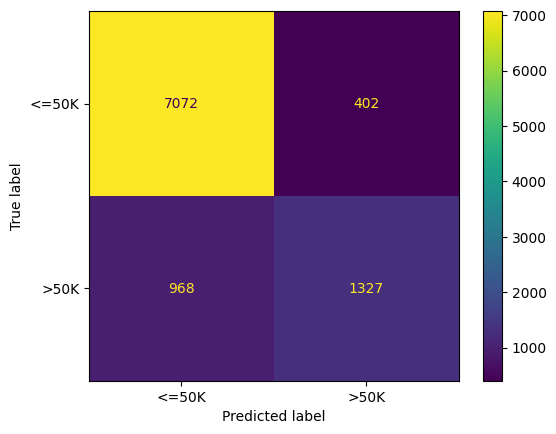

In [94]:
# Displays a Confusion Matrix for the perdicted values
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### The new parametes found by gridsearch have improved the model for predicting income. The precision, recall and accuracy have all impoved, and as seen by the two confusion matrixes, the true positives increased while the rest decreased.